<a href="https://colab.research.google.com/github/ajaythakur3369/CVIP/blob/main/Task_4_Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Speech Emotion Recognition**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - CodersCave**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CVIP/blob/main/Task_4_Speech_Emotion_Recognition.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1PTE-XjZXdE6Y9Nbas39aYVOHFcoqQ8Q6)**

# **Problem Statement -**

The objective of this project is to develop a robust speech-emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and mor

In [31]:
# Imported all the required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [32]:
# Access the Drive from Colab, to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
paths = []
labels = []
for dirname, _ , filenames in os.walk('/content/drive/MyDrive/folders/TESS Dataset'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded successfully')

Dataset is loaded successfully


In [34]:
paths[:5]

['/content/drive/MyDrive/folders/TESS Dataset/YAF_sad/YAF_base_sad.wav',
 '/content/drive/MyDrive/folders/TESS Dataset/YAF_sad/YAF_bite_sad.wav',
 '/content/drive/MyDrive/folders/TESS Dataset/YAF_sad/YAF_burn_sad.wav',
 '/content/drive/MyDrive/folders/TESS Dataset/YAF_sad/YAF_bath_sad.wav',
 '/content/drive/MyDrive/folders/TESS Dataset/YAF_sad/YAF_boat_sad.wav']

In [35]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [36]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/folders/TESS Dataset/YA...,sad
1,/content/drive/MyDrive/folders/TESS Dataset/YA...,sad
2,/content/drive/MyDrive/folders/TESS Dataset/YA...,sad
3,/content/drive/MyDrive/folders/TESS Dataset/YA...,sad
4,/content/drive/MyDrive/folders/TESS Dataset/YA...,sad


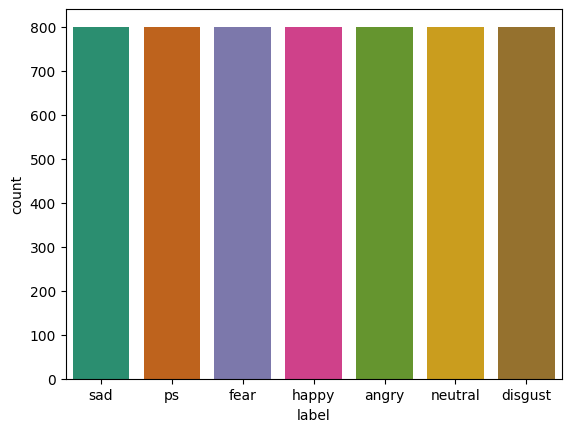

In [37]:
sns.countplot(data = df, x = 'label', palette = 'Dark2');
plt.show()

In [38]:
df['label'].value_counts()

sad        800
ps         800
fear       800
happy      800
angry      800
neutral    800
disgust    800
Name: label, dtype: int64

**EDA**

In [39]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr = sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11, 4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

**Fear Emotion Waves**

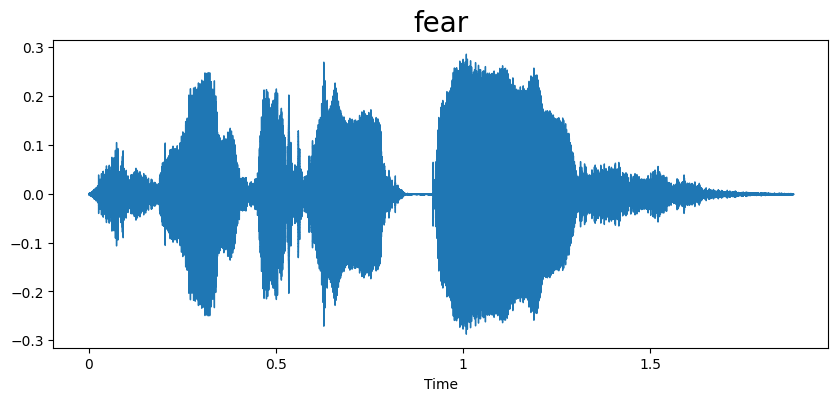

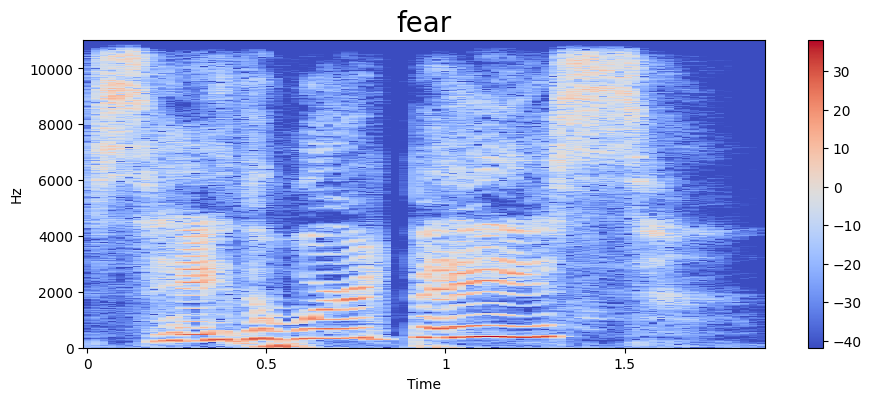

In [40]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Angry Emotion Waves**

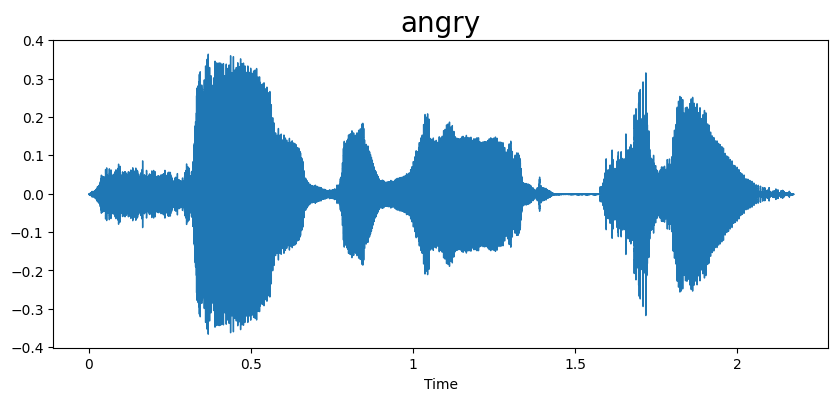

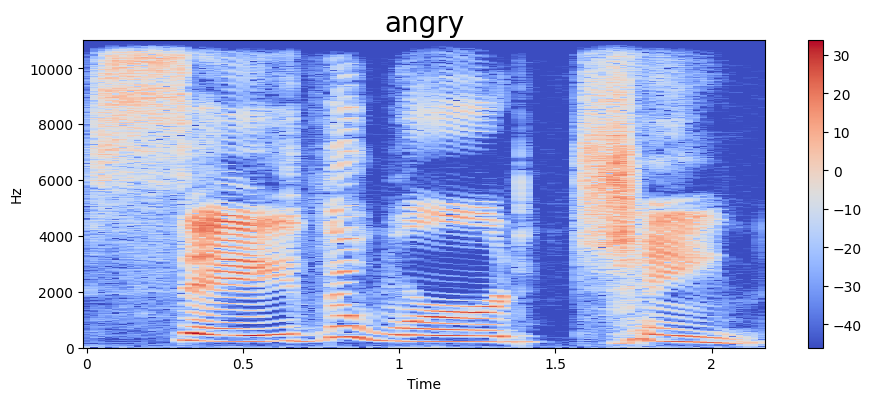

In [41]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Disgust Emotion Waves**

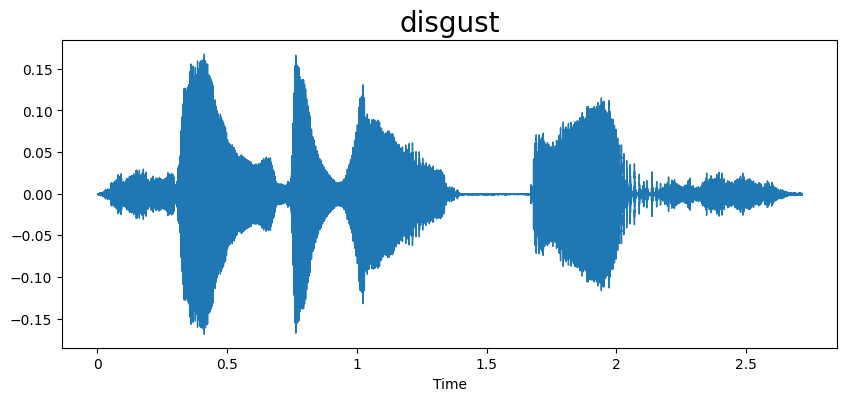

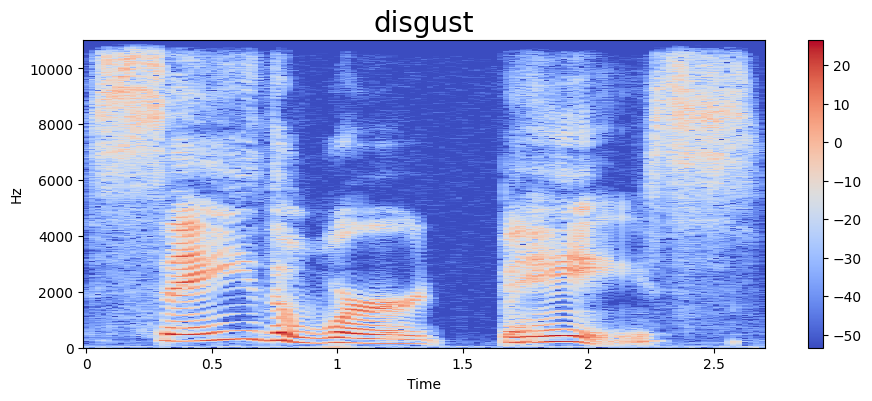

In [42]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Neutral Emotion Waves**

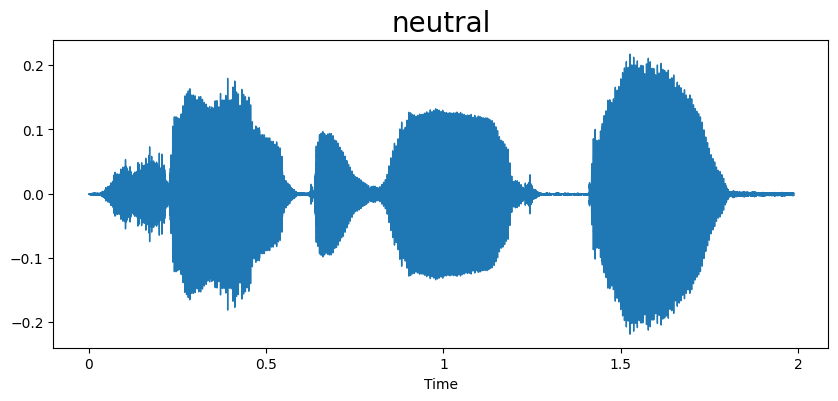

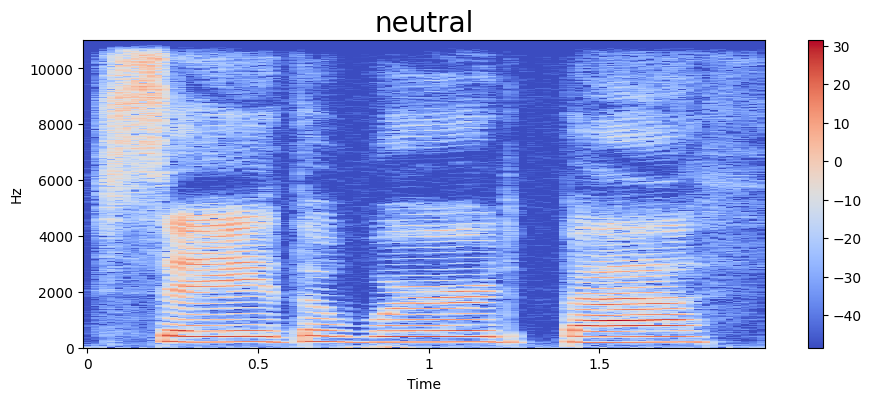

In [43]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Sadness Emotion Waves**

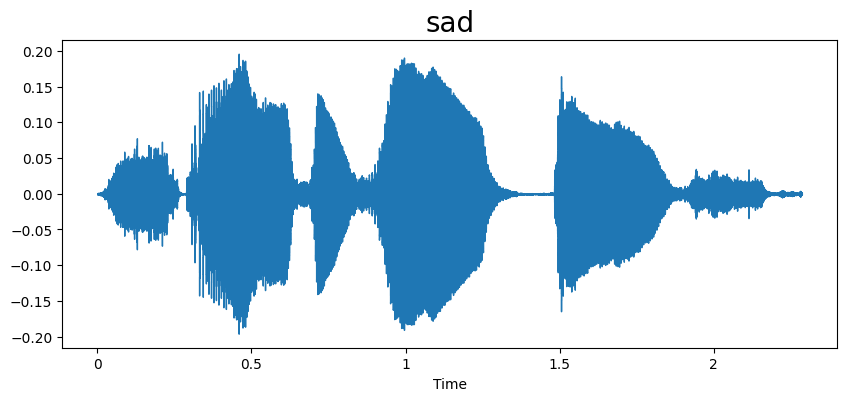

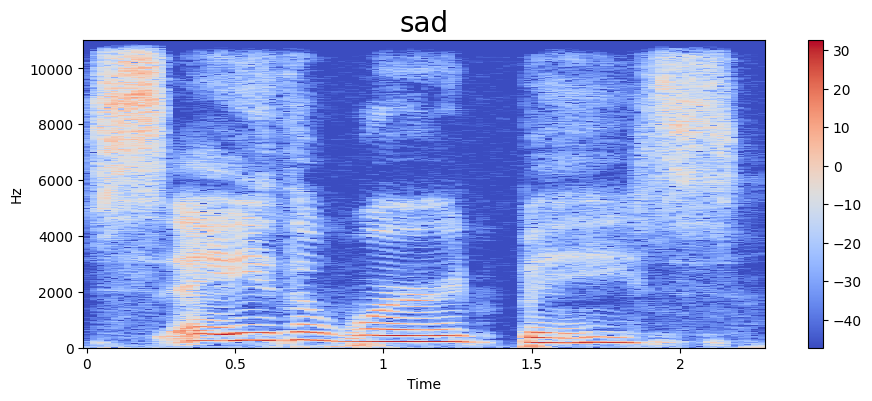

In [44]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Ps Emotion Waves**

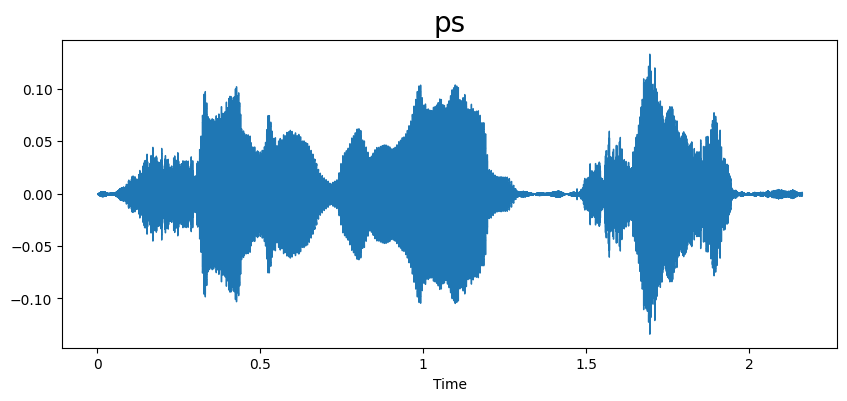

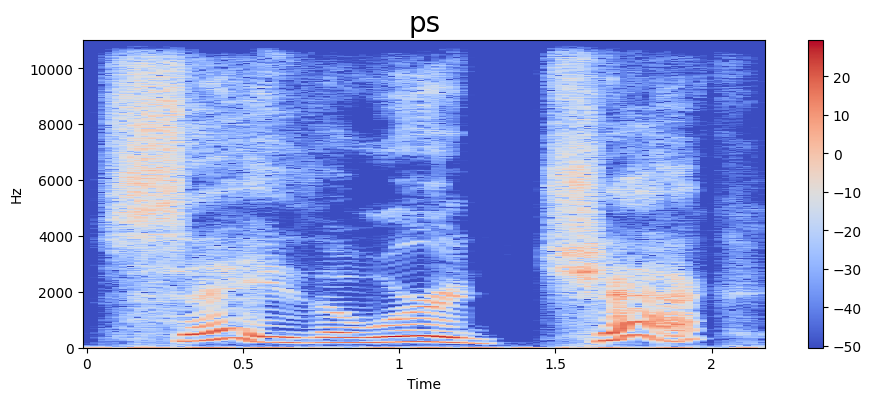

In [51]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Happiness Emotion Waves**

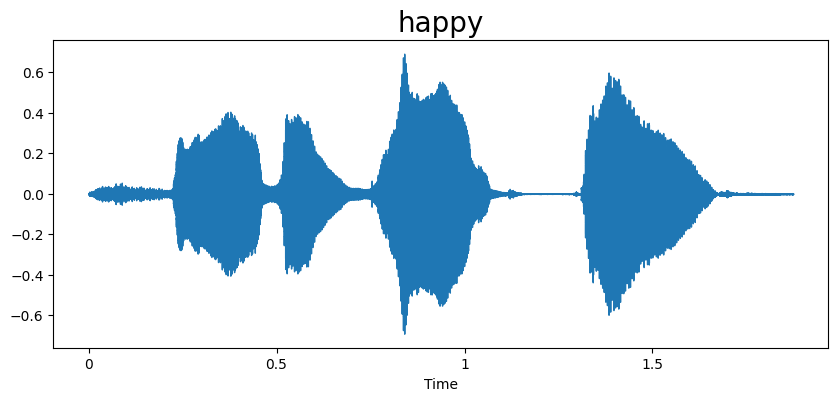

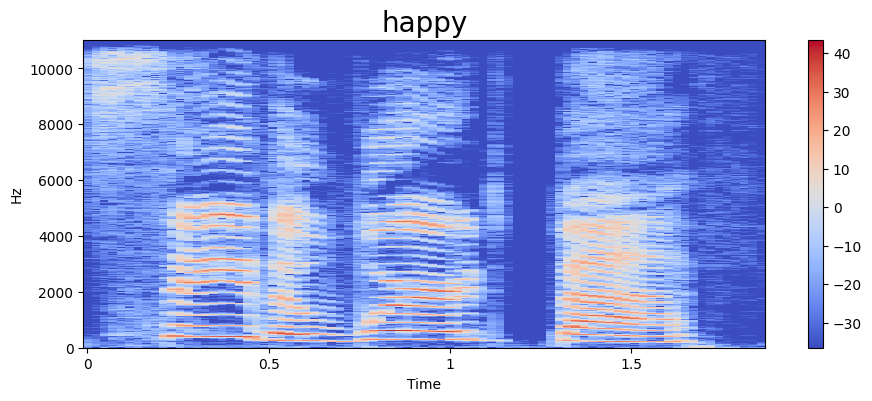

In [46]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [56]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-4.1267010e+02,  6.3570293e+01,  3.8221951e+01,  3.6780308e+01,
        4.6129603e+00,  6.0572562e+00,  1.4631394e-01, -1.1082541e+01,
        2.4000575e-01, -8.6380024e+00, -6.6434069e+00,  2.9701958e+00,
       -1.0360718e+01,  6.8114448e+00, -7.8490543e+00, -1.1024061e+00,
        1.1483886e+00, -4.0628552e+00, -9.9071951e+00, -5.1448169e+00,
       -9.3994055e+00, -7.4314170e+00, -6.3354597e+00, -9.1229904e-01,
       -1.6208977e+00,  7.3178868e+00,  5.3473991e-01, -6.9872671e-01,
        1.2101849e+00,  9.8075610e-01,  6.3850336e+00,  1.5400264e+01,
        7.6621776e+00,  7.4863105e+00, -1.0292995e+00,  3.1004555e+00,
        3.3709178e+00,  7.2393918e+00,  5.9534712e+00,  3.8517282e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-412.6701, 63.570293, 38.22195, 36.780308, 4....
1       [-484.04868, 100.70197, 28.202692, 30.393433, ...
2       [-416.5141, 104.301476, 7.721078, 25.886944, 2...
3       [-393.96503, 86.37926, 10.630319, 29.49811, 0....
4       [-426.213, 90.70138, 15.572073, 24.682667, -5....
                              ...                        
5595    [-487.9455, 105.19599, 25.1354, 5.089146, 25.5...
5596    [-458.74097, 91.91988, 21.632233, 5.899204, 15...
5597    [-492.5047, 84.88246, 18.27346, 6.8851466, 16....
5598    [-427.32526, 97.908775, 10.194952, 7.9185, 17....
5599    [-431.3118, 114.33447, 23.752438, 0.1923666, 1...
Name: speech, Length: 5600, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [22]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(5600, 7)

**LSTM Model**

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences = False, input_shape = (40, 1)),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [27]:
history = model.fit(X, y, validation_split = 0.2, epochs = 50, batch_size = 64)

Epoch 1/50
70/70 [==============================] - 16s 190ms/step - loss: 0.8533 - accuracy: 0.6788 - val_loss: 0.4651 - val_accuracy: 0.8250
Epoch 2/50
70/70 [==============================] - 13s 185ms/step - loss: 0.2461 - accuracy: 0.9219 - val_loss: 0.3793 - val_accuracy: 0.8554
Epoch 3/50
70/70 [==============================] - 10s 144ms/step - loss: 0.1743 - accuracy: 0.9469 - val_loss: 0.2506 - val_accuracy: 0.9187
Epoch 4/50
70/70 [==============================] - 13s 191ms/step - loss: 0.1048 - accuracy: 0.9667 - val_loss: 0.0542 - val_accuracy: 0.9812
Epoch 5/50
70/70 [==============================] - 15s 219ms/step - loss: 0.0984 - accuracy: 0.9685 - val_loss: 0.2772 - val_accuracy: 0.9161
Epoch 6/50
70/70 [==============================] - 12s 167ms/step - loss: 0.1057 - accuracy: 0.9674 - val_loss: 0.2418 - val_accuracy: 0.9259
Epoch 7/50
70/70 [==============================] - 13s 184ms/step - loss: 0.1035 - accuracy: 0.9688 - val_loss: 0.4844 - val_accuracy: 0.8562

In [28]:
acc = history.history['accuracy']
mean_accuracy = sum(acc)/len(acc)
mean_accuracy*100

98.25357139110565

**Plotting Results**

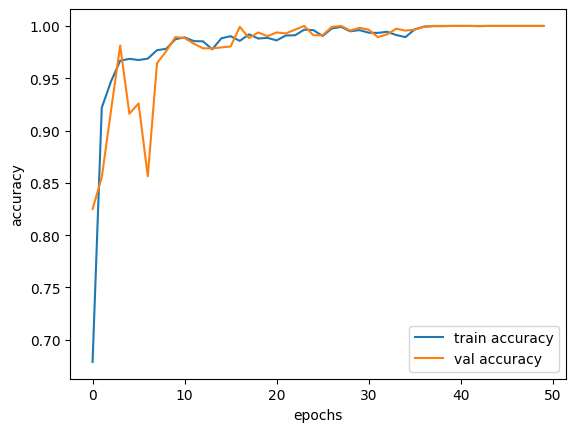

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

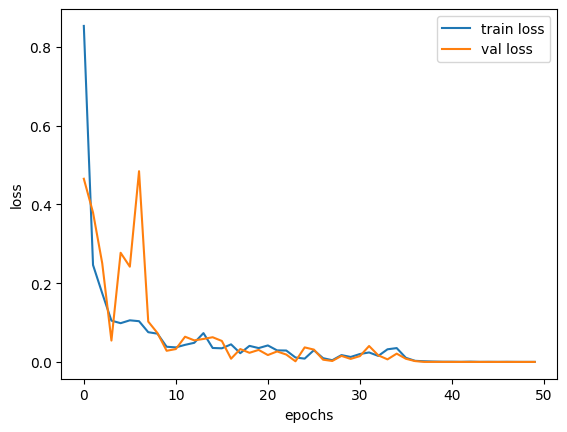

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()